# Data exploration
Most data evaluation start with a pandas dataframe. So the rest of the group does not have to deal with the sql database i have decided to create this template so everyone can start form the pandas dataframe


In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
con = sqlite3.connect("../02-Data_Curation/unified.db")
cur = con.cursor()

df = pd.read_sql_query("SELECT * FROM prod", con)
df

,id,name,AB,description,OX,source,seq,valid
0,DRAMP00303; P29137,dramp_DRAMP00303; CHI1_CASSA,1,Basic endochitinase CH1 (Fragment),alien; Castanea sativa OX=21020,dramp_antimicrobial.fasta; uniprot_swissprot.f...,ACGGGGGDVGSLISASLFDQMLKYRNDPRCCXXGF,yes - merged duplicate
1,DRAMP02488; P0DI85,dramp_DRAMP02488; OXLA8_DEIAC,1,L-amino-acid oxidase ACTX-8 (Fragment),alien; Deinagkistrodon acutus OX=36307,dramp_antimicrobial.fasta; uniprot_swissprot.f...,ADDRNPLEEFRENNYEEFL,yes - merged duplicate
2,ADAM_0078; P86520,InverPep_ADAM_0078; SBTXA_SOYBN,1,Soybean toxin 27 kDa chain (Fragment),alien; Glycine max OX=3847,InverPep.fasta; uniprot_swissprot.fasta,ADPTFGFTPLGLSEKANLQIMKAYD,yes - merged duplicate
3,ADAM_0131; P81493,InverPep_ADAM_0131; DFAX1_BETVU,1,Defensin-like protein AX1,alien; Beta vulgaris OX=161934,InverPep.fasta; uniprot_swissprot.fasta,AICKKPSKFFKGACGRDADCEKACDQENWPGGVCVPFLRCECQRSC,yes - merged duplicate
4,ADAM_0141; P84644,InverPep_ADAM_0141; CIRF_CHAPA,1,Circulin-F,alien; Chassalia parviflora OX=58431,InverPep.fasta; uniprot_swissprot.fasta,AIPCGESCVWIPCISAAIGCSCKNKVCYR,yes - merged duplicate
...,...,...,...,...,...,...,...,...
12403,Q9R4P0,RL29_BREVE,0,Large ribosomal subunit protein uL29 (Fragment),Brevundimonas vesicularis OX=41276 GN=rpmC,uniprot_swissprot.fasta,TKIADLRSQTTDQLSDELLKLXKEQ,yes
12404,Q9R4P1,RS21_BREVE,0,Small ribosomal subunit protein bS21 (Fragment),Brevundimonas vesicularis OX=41276 GN=rpsU,uniprot_swissprot.fasta,VQIFVRDNNVDQALKALK,yes
12405,Q9R4P4,RL29_BREDI,0,Large ribosomal subunit protein uL29 (Fragment),Brevundimonas diminuta OX=293 GN=rpmC,uniprot_swissprot.fasta,TKIADLRSQTVDQLSDXLXKL,yes
12406,Q9R4P6,RS21_BREDI,0,Small ribosomal subunit protein bS21 (Fragment),Brevundimonas diminuta OX=293 GN=rpsU,uniprot_swissprot.fasta,VQIFVXDNNVDQALK,yes


# Compare Positive/negative Data

In [8]:
pd.read_sql_query("SELECT COUNT(*), AB FROM prod GROUP BY AB", con)

,COUNT(*),AB
0,6005,0
1,6403,1


This is more or less a 1:1 ratio. This is good.


# Compare lengths


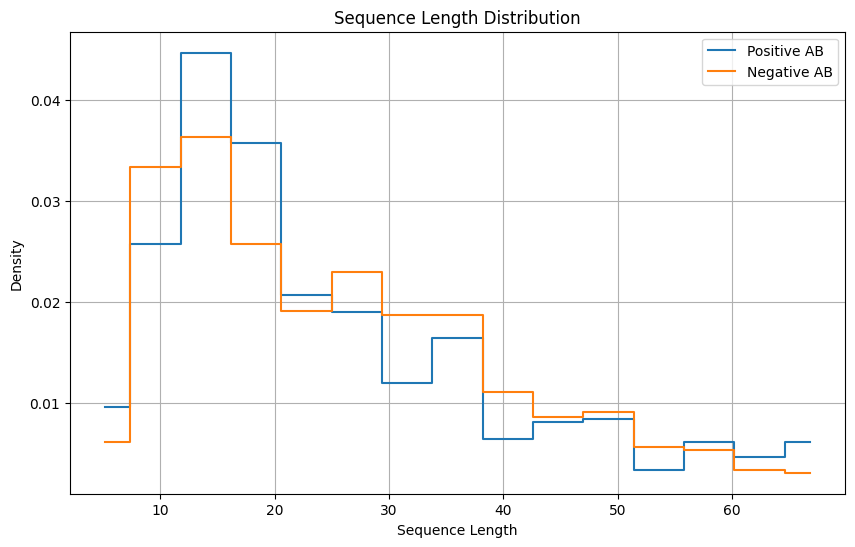

In [18]:
# Calculate lengths
df['seq_length'] = df['seq'].apply(lambda x: len(x))

# Separate by AB values
positive = df[df['AB'] == 1]
negative = df[df['AB'] == 0]

# Calculate histogram data
hist_data_pos, bin_edges_pos = np.histogram(positive['seq_length'], bins=15, density=True)
hist_data_neg, bin_edges_neg = np.histogram(negative['seq_length'], bins=15, density=True)

# Midpoints of bins
bin_centers_pos = 0.5 * (bin_edges_pos[1:] + bin_edges_pos[:-1])
bin_centers_neg = 0.5 * (bin_edges_neg[1:] + bin_edges_neg[:-1])

# Create line plot
plt.figure(figsize=(10, 6))
plt.plot(bin_centers_pos, hist_data_pos, label='Positive AB', drawstyle='steps-mid')
plt.plot(bin_centers_neg, hist_data_neg, label='Negative AB', drawstyle='steps-mid')
plt.legend()
plt.title('Sequence Length Distribution')
plt.xlabel('Sequence Length')
plt.ylabel('Density')
plt.grid(True)
plt.show()